# The Data Investigation

In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from [FiveThirtyEight](https://fivethirtyeight.com). FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

To begin, we need to take a look at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. What Do Men Think It Means To Be A Man?  to see their major takeaways. We're going to try to find more insights using machine learning.

First, let's start getting a sense of how this data is structured and try to answer these questions using your Pandas:

* What are the names of the columns? How do those columns relate to the questions in the PDF?
* How many rows are there?
* How is a question with multiple parts, like question 7, represented in the DataFrame?
* How many people said they often ask a friend for professional advice? This is the first sub-question in question 7.




In [306]:
import pandas as pd
survey = pd.read_csv("masculinity.csv")
print(survey.columns)
print(len(survey))
print(survey["q0007_0001"].value_counts())
print(survey.head())


Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

# Mapping the Data

In order for us to start thinking about using the KMeans algorithm with this data, we need to first figure out how to turn these responses into numerical data. Let's once again consider question 7. We can't cluster the data using the strings like  `"Often"` or `"Rarely"`, but we can turn those phrases into numbers. Therefore, we will map the data in the following way: 

* `"Often"` -> `4`
* `"Sometimes"` ->  `3`
* `"Rarely"` -> `2` 
* `"Never, but open to it"` -> `1`
* `"Never, and not open to it"` -> `0`.




In [307]:
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    survey[col] = survey[col].map({"Never, and not open to it": 0, "Never, but open to it": 1, "Rarely": 2, "Sometimes": 3, "Often": 4})
    
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


# Plotting the Data

We now have 11 different features that we could use in our KMeans algorithm. Before we jump into clustering, let's graph some of these features on a 2D graph. Let's plot `survey["q0007_0001"]` and `survey["q0007_0002"]`. 




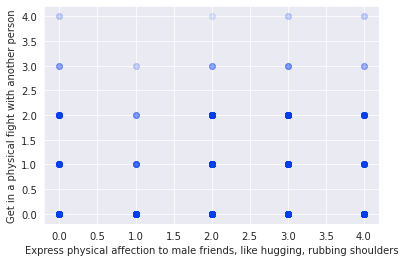

In [308]:
from matplotlib import pyplot as plt
plt.scatter(survey["q0007_0003"], survey["q0007_0005"], alpha = 0.1)
plt.xlabel('Express physical affection to male friends, like hugging, rubbing shoulders')
plt.ylabel('Get in a physical fight with another person')
plt.show()

We can see that if a person expresses physical affection to male friends, like hugging, rubbing shoulders, then he is less likely to get in a physical fight with another person.



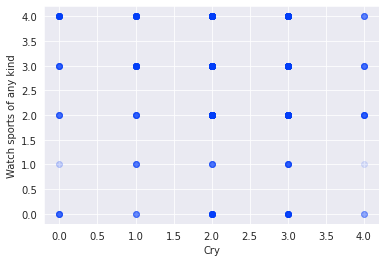

In [309]:
plt.scatter(survey["q0007_0004"], survey["q0007_0008"], alpha = 0.1)
plt.xlabel('Cry')
plt.ylabel('Watch sports of any kind')
plt.show()

If a person tends to watch sports of any kind then he can also express his feelings by crying.

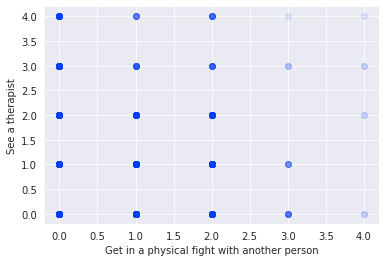

In [310]:
plt.scatter(survey["q0007_0005"], survey["q0007_0010"], alpha = 0.1)
plt.xlabel('Get in a physical fight with another person')
plt.ylabel('See a therapist')
plt.show()

We can see that if a man sees a therapist then he can also get in a physical fight with another person. But there are less people who actually get in a physical fight with another person, than see a therapist. 

# Building the KMeans Model

It's now time to start clustering! There are so many interesting questions we could ask about this data. Let's start by seeing if clusters form based on traditionally masculine concepts. 

Take a look at the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

We need to first drop all of the rows that contain a `NaN` value in any of the columns we're interested in. 

In [311]:
from sklearn.cluster import KMeans
rows_to_cluster0 = survey.dropna(subset =["q0007_0003", "q0007_0004"])
classifier0 = KMeans(n_clusters = 2 )
classifier0.fit(rows_to_cluster[["q0007_0003", "q0007_0004"]])

rows_to_cluster1 = survey.dropna(subset =[ "q0007_0005", "q0007_0008", "q0007_0009"])
classifier1 = KMeans(n_clusters = 2 )
classifier1.fit(rows_to_cluster[[ "q0007_0005", "q0007_0008", "q0007_0009"]])






KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Separating the Cluster Members

When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluster and a masculine cluster, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

We might be able to find out more information about these clusters by looking at the specific members of each cluster. If I print `classifier.labels_`, it will give me a list that shows which cluster every row in the DataFrame corresponds to.

For example,  if `classifier.labels_` was `[1, 0 ,1]`, then the first row in the DataFrame would be in cluster one, the second row would be in cluster 0, and the third row would be in cluster one. A row represents one persons answers to every question in the survey.



In [312]:
classifier.labels_
cluster_fem_indices = []
cluster_men_indices = []
for i in range(len(classifier0.labels_)):
    if classifier0.labels_[i] ==1:
        cluster_fem_indices.append(i)
    if classifier.labels_[i] == 0:
        cluster_men_indices.append(i)

cluster_men1_indices = []
cluster_fem1_indices = []
for i in range(len(classifier1.labels_)):
    if classifier1.labels_[i] ==1:
        cluster_men1_indices.append(i)
    if classifier.labels_[i] == 0:
        cluster_fem1_indices.append(i)
masculine = cluster_men_indices+ cluster_men1_indices      
feminine = cluster_fem_indices + cluster_fem1_indices       

# Investigating the Cluster Members

Now that we have the indices for each cluster, let's look at some stats about these two clusters. We can get the rows of the DataFrame that correspond to cluster zero.

Finally, let's look at some information about these two clusters. By printing the `value_counts()` of the `educ4` column of each cluster we can find how the education level changes in our clusters.

If we divide the result of `value_counts()` by the size of the cluster, we get the percentage of people in each category rather than the total number. This will make it easier to compare the two clusters.

In [313]:
cluster_masc = rows_to_cluster.iloc[masculine]
cluster_fem = rows_to_cluster.iloc[feminine]
educ_zero = cluster_masc['educ4'].value_counts()/len(cluster_masc)
educ_one = (cluster_fem['educ4'].value_counts())/len(cluster_fem)

df = pd.DataFrame([educ_zero, educ_one]).reset_index()
df = df.drop(['index'], axis=1)
print(len(cluster_masc))
print(len(cluster_fem))
print(df)

638
669
   Some college  College or more  Post graduate degree  High school or less
0      0.308777         0.282132              0.263323             0.142633
1      0.304933         0.289985              0.254111             0.147982


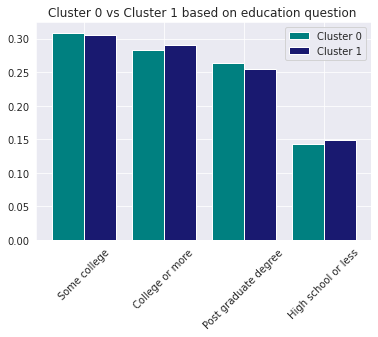

<function matplotlib.pyplot.clf>

In [314]:
import seaborn as sns

labels = ['Somewhat masculine', 'Very masculine', 'Not very masculine ' , 'Not at all masculine', 'No answer']

ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('Cluster 0 vs Cluster 1 based on education question ')
plt.show()
plt.clf

# Comparing orientation in clusters

Now that we've found out that by answering those 7 questions people don't fall into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education!

Now instead of 'edication' I want to see how the clusters change if we divide them based on their answers in 'orientation' column and 'how masculine or “manly” do you feel' column.  



In [315]:
orient_zero = (cluster_masc['orientation'].value_counts())/len(cluster_masc)
orient_one = (cluster_fem['orientation'].value_counts())/len(cluster_fem)
df = pd.DataFrame([orient_zero, orient_one]).reset_index()
df = df.drop(['index'], axis=1)

print(df)

   Straight  Gay/Bisexual     Other  No answer
0  0.849530      0.125392  0.020376   0.001567
1  0.920777      0.059791  0.014948   0.001495


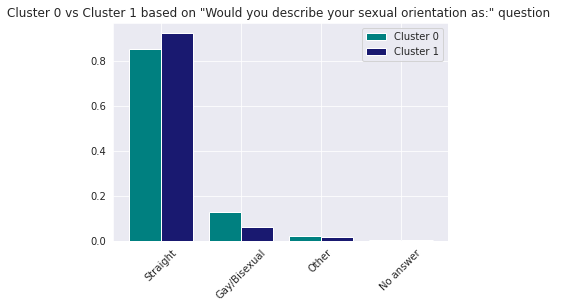

<function matplotlib.pyplot.clf>

In [316]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('Cluster 0 vs Cluster 1 based on "Would you describe your sexual orientation as:" question ')
plt.show()
plt.clf

# Comparing how people in our two clusters self-evaluate their masculinity 

In [317]:
masc1 = (cluster_masc['q0001'].value_counts())/len(cluster_masc)
masc0 = (cluster_fem['q0001'].value_counts()/len(cluster_fem))
df = pd.DataFrame([masc0, masc1]).reset_index()
df = df.drop(['index'], axis=1)
print(df)

   Somewhat masculine  Very masculine  Not very masculine  \
0            0.502242        0.360239            0.101644   
1            0.517241        0.321317            0.120690   

   Not at all masculine  No answer  
0              0.020927   0.014948  
1              0.025078   0.015674  


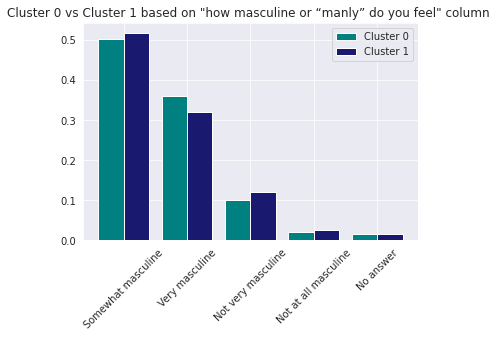

In [318]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('Cluster 0 vs Cluster 1 based on "how masculine or “manly” do you feel" column ')
plt.show()

# How important is it to you that others see you as masculine?

In [319]:
masc1 = (cluster_masc['q0002'].value_counts())/len(cluster_masc)
masc0 = (cluster_fem['q0002'].value_counts()/len(cluster_fem))
df = pd.DataFrame([masc0, masc1]).reset_index()
df = df.drop(['index'], axis=1)
print(df)

   Somewhat important  Not too important  Very important  \
0            0.369208           0.306428        0.167414   
1            0.319749           0.335423        0.139498   

   Not at all important  No answer  
0              0.156951        NaN  
1              0.203762   0.001567  


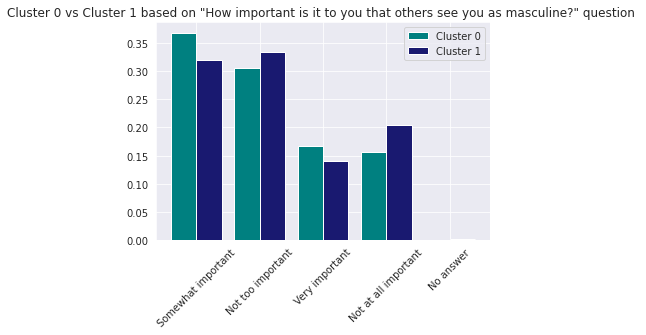

In [320]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('Cluster 0 vs Cluster 1 based on "How important is it to you that others see you as masculine?" question ')
plt.show()

# Do you think that society puts pressure on men in a way that is unhealthy or bad? 

In [280]:
masc1 = (cluster_masc['q0005'].value_counts())/len(cluster_masc)
masc0 = (cluster_fem['q0005'].value_counts()/len(cluster_fem))
df = pd.DataFrame([masc0, masc1]).reset_index()
df = df.drop(['index'], axis=1)
print(df)

         No       Yes  No answer
0  0.505232  0.484305   0.010463
1  0.453469  0.542301   0.004230


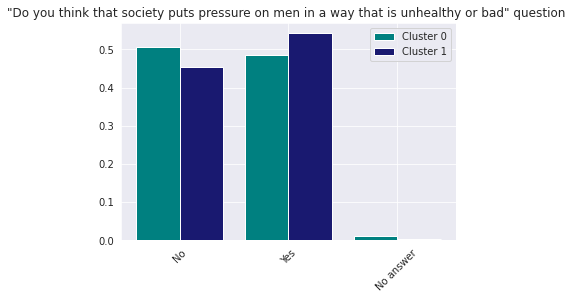

In [281]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 3 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 3 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('"Do you think that society puts pressure on men in a way that is unhealthy or bad" question ')
plt.show()

# Do you typically feel as though you’re expected to make the first move in romantic relationships?

In [282]:
masc1 = (cluster_masc['q0017'].value_counts())/len(cluster_masc)
masc0 = (cluster_fem['q0017'].value_counts()/len(cluster_fem))
df = pd.DataFrame([masc0, masc1]).reset_index()
df = df.drop(['index'], axis=1)
print(df)

        Yes        No  No answer
0  0.578475  0.411061   0.010463
1  0.628596  0.357868   0.013536


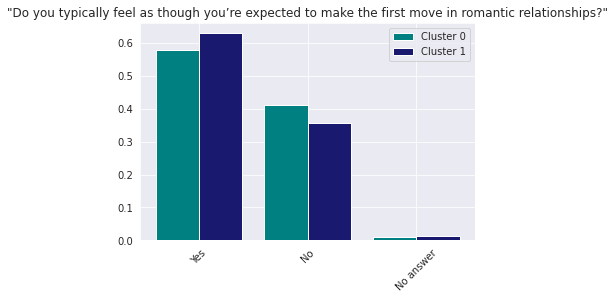

In [283]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 3 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 3 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('"Do you typically feel as though you’re expected to make the first move in romantic relationships?"')
plt.show()

# How often do you try to be the one who pays when on a date?

In [284]:
masc1 = (cluster_masc['q0018'].value_counts())/len(cluster_masc)
masc0 = (cluster_fem['q0018'].value_counts()/len(cluster_fem))
df = pd.DataFrame([masc0, masc1]).reset_index()
df = df.drop(['index'], axis=1)
print(df)

     Always     Often  Sometimes     Never  No answer    Rarely
0  0.538117  0.234679   0.097160  0.085202   0.029895  0.014948
1  0.527919  0.270728   0.118443  0.046531   0.023689  0.012690


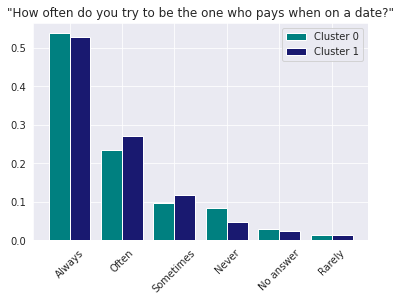

In [285]:
ax = plt.subplot()
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
x_values1 = [t*element + w*n for element
             in range(d)]


n = 2  # This is our second dataset (out of 2)
t = 2 # Number of datasets
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar
x_values2 = [t*element + w*n for element
             in range(d)]
middle_x= [(a+b)/2 for a,b in zip(x_values1, x_values2)] 

[t*element + w*n for element in range(d)]
colors = ['#191970','#008080' ]
plt.bar(x_values1, df.iloc[0], color = '#008080' )
plt.bar(x_values2, df.iloc[1], color = '#191970' )
ax.set_xticks(middle_x)
ax.set_xticklabels(df.columns, rotation  = 45)
ax.legend(['Cluster 0', 'Cluster 1'])
sns.set_style('darkgrid')
sns.set_palette('bright')
plt.title('"How often do you try to be the one who pays when on a date?"')
plt.show()

# Conclusion 

1189 men participated in a survey conducted by FiveThirtyEight and WNYC studios. The goal was to get their male readers' thoughts on masculinity.

My objective in this project was to build an unsupervised machine learning model with K-Means, investigate the 2 clusters to find interesting information on them.

I based the clustering on the question number 7 of the survey and with K-Means I created 2 clusters:

* Cluster 0, Men who answered ‘Often’ and  ‘Sometimes’ to “Get in a physical fight with another person, Watch sports of any kind and Work out” and also “Rarely and Never” to “Express physical affection to male friends, like hugging, rubbing shoulders” and “Cry”. I called this cluster ‘Masculine’ as these types of behaviour represent the traditionally masculine activities. 


* Cluster 1, Men who answered ‘Often’ and  ‘Sometimes’ to “Express physical affection to male friends, like hugging, rubbing shoulders” and “Cry” and also “Rarely and Never” to “Get in a physical fight with another person, Watch sports of any kind and Work out”. I called this cluster ‘Feminine’ as these types of behaviour represent the traditionally feminine activities. 

Here the conclusions I came up with:


* if a person expresses physical affection to male friends, like hugging, rubbing shoulders, then he is less likely to get in a physical fight with another person.
* if a person Ask a friend for personal advice then it is normal for him to Ask a friend for professional advice
* If a person tends to watch sports of any kind, then he can also express his feelings by crying.
* if a man sees a therapist then he can also get in a physical fight with another person. But some less people actually get in a physical fight, than see a therapist.


Conclusions on the clusters:


* Men from masculine cluster have a bit higher education level: 31% have a post-graduate degree and only 10% finished high school or less compared to 25% and 15% respectively of the feminine cluster.
* Masculine or feminine types of behaviour do not affect their sexual orientation. 84% of men in both clusters are straight.
* In both clusters 50% and 51% men feel “somewhat masculine” and only 35% and 38% feel “very masculine”
* It is more important for those who often get in a fight that others see them as masculine and the feminine cluster cares less about it.
* Both groups agree by 49% and 52% respectively that society puts pressure on men in a way that is unhealthy or bad.
* 64% of the feminine and 58% of the masculine clusters think that they are expected to make the first move in romantic relationships, so they might have more successful romantic relationships.   
* And to finish masculine or feminine types of behaviour do not affect their aspiration to pay when on a date, 54% and 53% always do try to be the one who pays.

To sum up, we learned from this survey that the features that differentiate a real man are:


having a post-graduate degree, feeling masculine about himself, and thinking less about what others think about it, making the first romantic move in a relationship, and trying to pay when on a date.